In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
# 1. What is the minimum, median, max, and average salary for employee by Married Description and Gender
# Hints: use agg function
# Expected Output as below
# (5 Points)

result = data.groupby(['MaritalDesc', 'Sex']).agg(
    min_salary=pd.NamedAgg(column='Salary', aggfunc='min'),
    median_salary=pd.NamedAgg(column='Salary', aggfunc='median'),
    max_salary=pd.NamedAgg(column='Salary', aggfunc='max'),
    average_salary=pd.NamedAgg(column='Salary', aggfunc='mean')
).reset_index()

print(result)

  MaritalDesc Sex  min_salary  median_salary  max_salary  average_salary
0    Divorced   F       45069        59393.0       68182    57345.500000
1    Divorced  M        45115        63738.5      148999    72520.857143
2     Married   F       45433        62662.0      250000    69638.986111
3     Married  M        46120        63370.5      157000    70089.038462
4   Separated   F       52984        60627.0       66149    60658.888889
5   Separated  M        64397        70468.0       74417    69760.666667
6      Single   F       45395        62068.0      220450    68988.266667
7      Single  M        46428        63055.5      178000    71340.048387
8     Widowed   F       45046        63303.5      107226    69719.750000
9     Widowed  M        52788        61359.0       67176    60670.500000


2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
total_termination = data["TermReason"].value_counts().head(5)

print(total_termination)


N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64


3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
#code here
perform_exceeds = data[(data['PerformanceScore'] == 'Exceeds')]
perform_exceeds.groupby('RecruitmentSource').\
agg(total_recruit =('RecruitmentSource', 'count')).\
    sort_values(by='total_recruit', ascending=False)

,total_recruit
RecruitmentSource,
Indeed,12
LinkedIn,9
Diversity Job Fair,6
Employee Referral,5
CareerBuilder,2
Google Search,2
Website,1


4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
data.groupby('Department').\
    agg(ManagerName=('ManagerName', 'nunique'))

,ManagerName
Department,
Admin Offices,3
Executive Office,1
IT/IS,6
Production,10
Sales,4
Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
#code here
data['Termd'].groupby(data['Sex']).value_counts(normalize=True)

Sex  Termd
F    0        0.659091
     1        0.340909
M    0        0.674074
     1        0.325926
Name: Termd, dtype: float64

# Create an EDA and Data Visualization Question

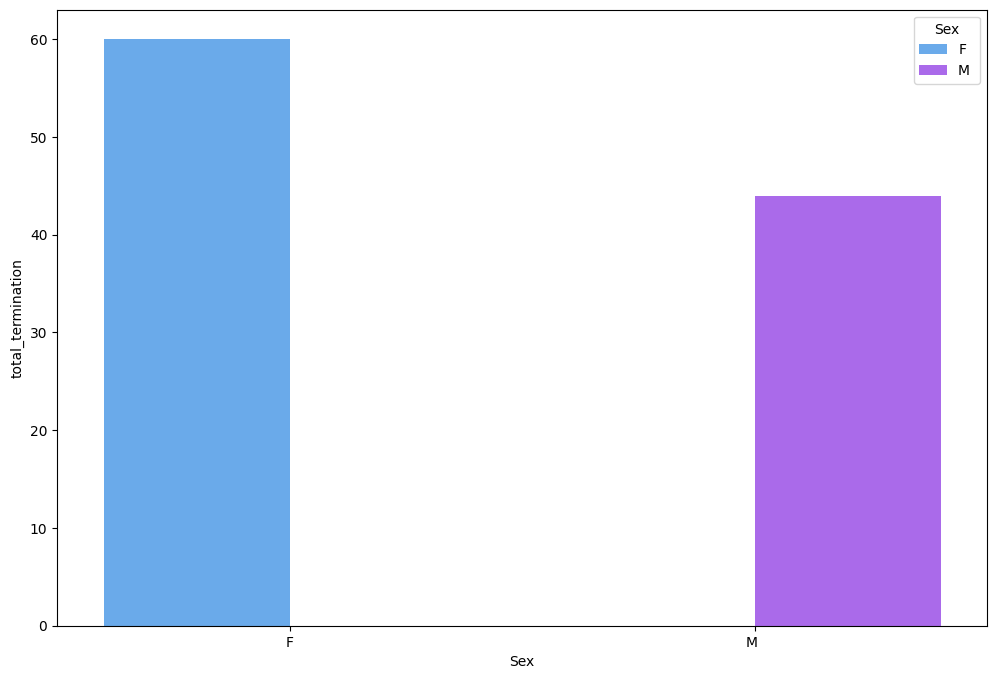

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

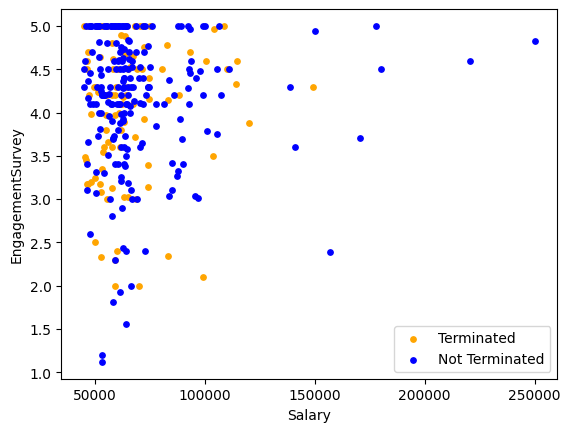

In [ ]:
#code here
terminated = data[data['Termd'] == 1]
not_terminated = data[data['Termd'] == 0]

plt.xlabel('Salary')
plt.ylabel('EngagementSurvey')

# Membuat scatter plot dengan warna berbeda untuk setiap status 'Termd'
plt.scatter(terminated['Salary'], terminated['EngagementSurvey'], color='orange', label='Terminated',s=15)
plt.scatter(not_terminated['Salary'], not_terminated['EngagementSurvey'], color='blue', label='Not Terminated',s=15)
plt.legend()

plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

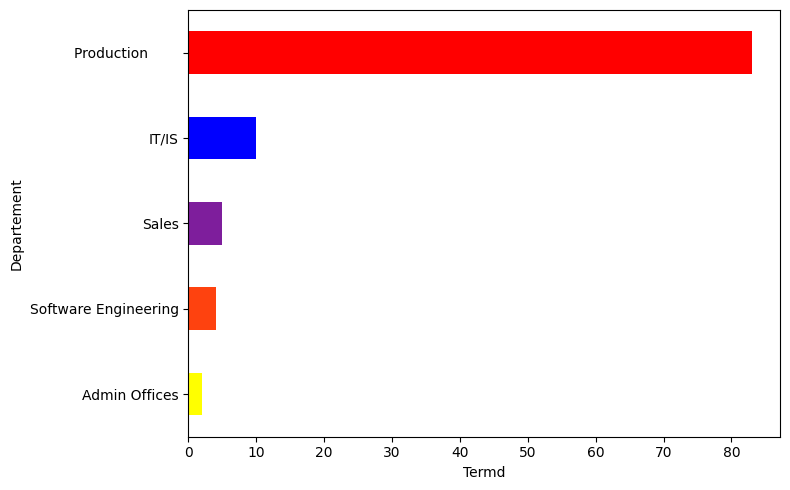

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

termination_counts = data[data['Termd'] == 1]['Department'].value_counts()

# Mengurutkan berdasarkan jumlah termination terbanyak
termination_counts = termination_counts.sort_values(ascending=True)

# Menggunakan warna berbeda untuk setiap departemen
colors = ['yellow', '#fe420f', '#7e1e9c', 'blue', 'red']

# Membuat bar chart horizontal
plt.figure(figsize=(8, 5))
termination_counts.plot(kind='barh', color=colors)
plt.xlabel('Termd')
plt.ylabel('Departement')


# Menampilkan plot
plt.tight_layout()
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

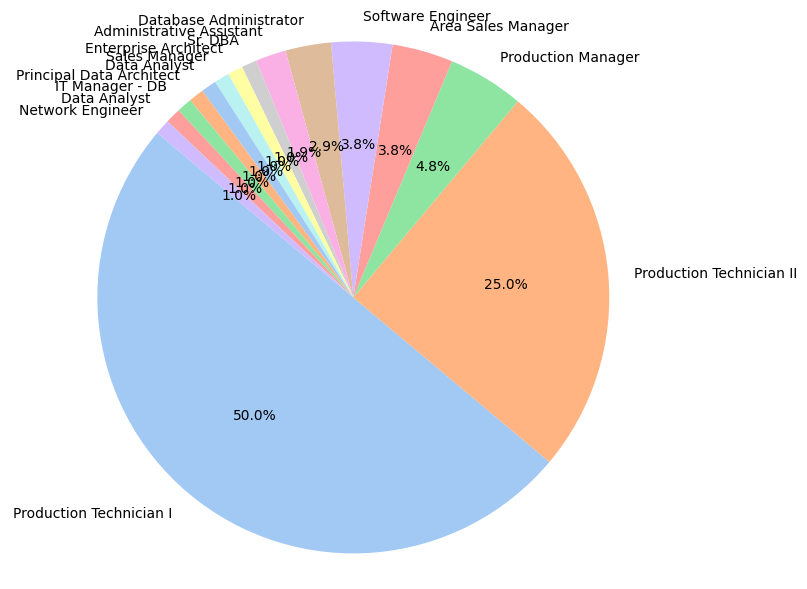

In [ ]:
termination_counts = data[data['Termd'] == 1]['Position'].value_counts()

colors = sns.color_palette('pastel', len(termination_counts))

# Membuat Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(termination_counts, labels=termination_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Agar pie chart terlihat lingkaran sempurna

# Menampilkan plot
plt.tight_layout()
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

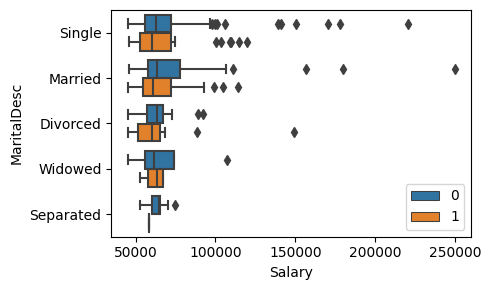

In [ ]:
#code here
plt.figure(figsize=(5, 3))
sns.boxplot(data=data, y='MaritalDesc', x='Salary', hue='Termd')
plt.legend()
plt.ylabel('MaritalDesc')
plt.xlabel('Salary')

# Menampilkan plot
plt.tight_layout()
plt.show()


10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

Pairplot


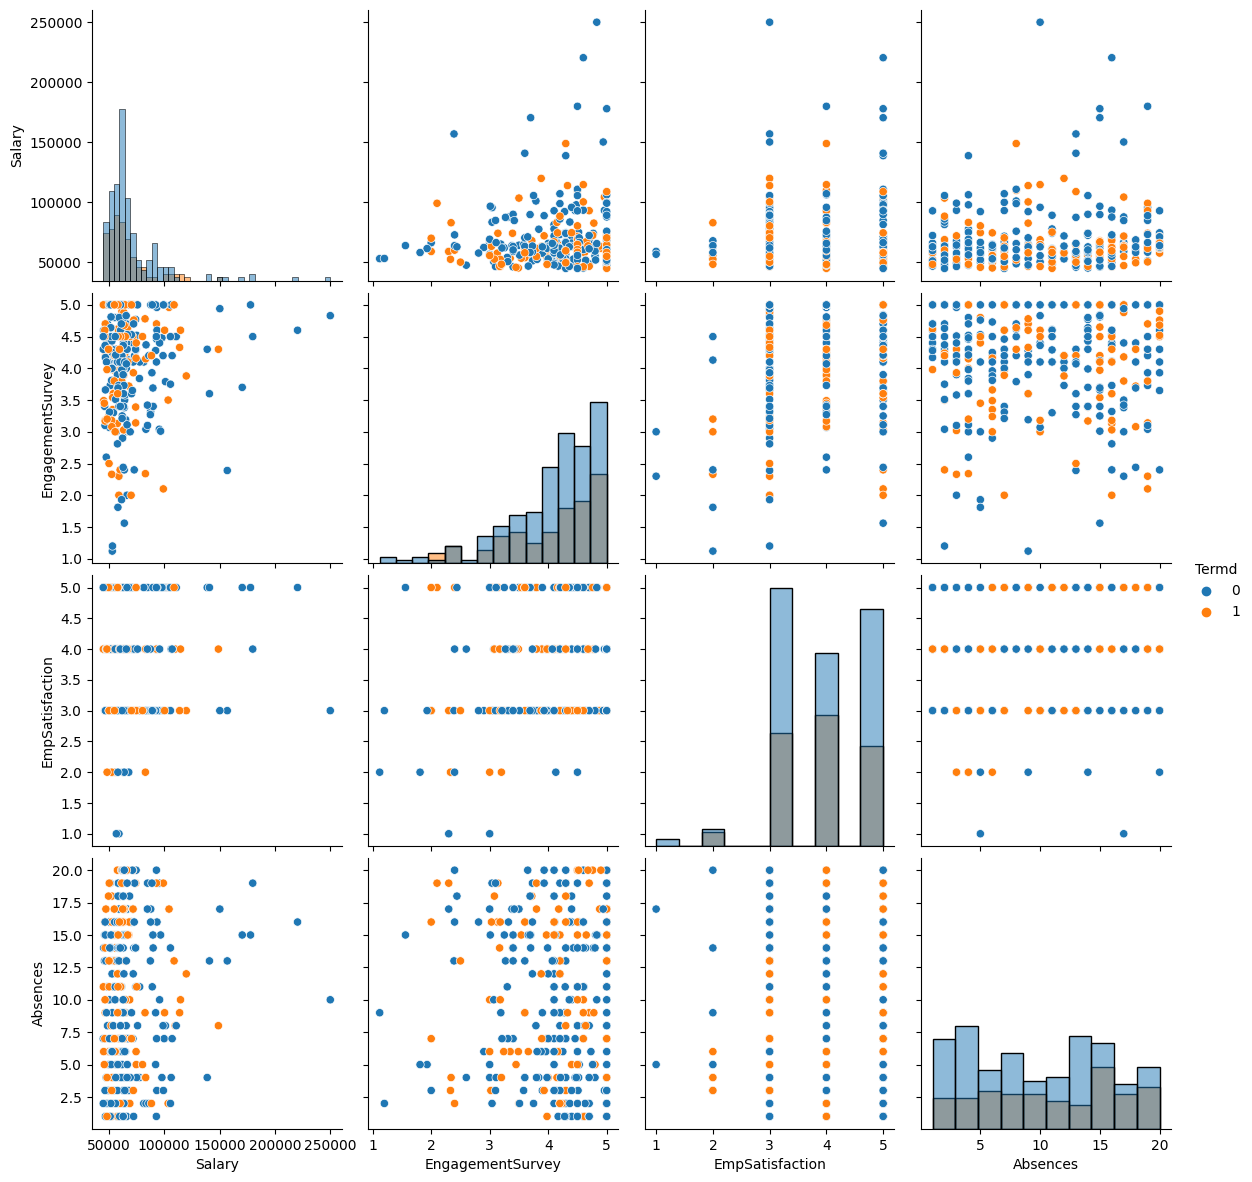

In [ ]:
#codde here
print('Pairplot')
sns.pairplot(data=data[['Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences', 'Termd']], hue='Termd', height=3, diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
#11. Buat fitur baru (kolom baru) berupa "Age" dalam satuan tahun. Untuk mendapatkannya, ambil data pada kolom DOB dikurangi dengan 2022
#(5 points)
data['DOB_Date'] = pd.to_datetime(data['DOB'])

# Menghitung umur (Age) dalam satuan tahun
data['Age'] = 2022 - data['DOB_Date'].dt.year

data[['DOB','DOB_Date','Age']].head()


,DOB,DOB_Date,Age
0,07/10/83,1983-07-10,39
1,05/05/75,1975-05-05,47
2,09/19/88,1988-09-19,34
3,09/27/88,1988-09-27,34
4,09/08/89,1989-09-08,33


In [ ]:
#12. Lakukan MinMaxScaler dari fitur "Salary"
# (5 points)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['Salary_minmax']=scaler.fit_transform(data[['Salary']])
data[['Salary','Salary_minmax']].head()

,Salary,Salary_minmax
0,62506,0.085190
1,104437,0.289777
2,64955,0.097139
3,64991,0.097315
4,50825,0.028197


In [ ]:
#13. Ubahlah semua tipe data object menjadi category
# 5 point
data_category = ['Employee_Name', 'Position', 'State', 'DOB',\
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',\
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',\
       'Department', 'ManagerName', 'RecruitmentSource',\
       'PerformanceScore', 'LastPerformanceReview_Date']
data[data_category]=data[data_category].astype('category')
data.dtypes

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#Setelah diubah category

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakana Label Encoder
# 5 point

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
from sklearn.preprocessing import LabelEncoder

label_recruitscore = LabelEncoder()
data.RecruitmentSource  = label_recruitscore.fit_transform(data.RecruitmentSource )

#15. Ubahlah "PerformanceScore" dengan menggunakana Label Encoder
# 5 point
label_performscore = LabelEncoder()
data.PerformanceScore  = label_performscore.fit_transform(data.PerformanceScore )

data.dtypes


Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                                 category
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#16. Pisahkan dependent variable dan independent variable
# 5 point

#Dependent Varible (target)
data_x = data[['MarriedID',	'MaritalStatusID',	'GenderID',	'DeptID',	'PerfScoreID',	'PositionID',	'Age',\
	'RecruitmentSource',	'PerformanceScore',	'Salary_minmax',	'Absences',	'SpecialProjectsCount',	'EmpSatisfaction',	'EngagementSurvey']]

#Independent Variable (feature)
data_y = data.Termd

data[['MarriedID',	'MaritalStatusID',	'GenderID',	'DeptID',	'PerfScoreID',	'PositionID',	'Age',\
	'RecruitmentSource',	'PerformanceScore',	'Salary_minmax',	'Absences',	'SpecialProjectsCount',	'EmpSatisfaction',	'EngagementSurvey']].head()

,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,PositionID,Age,RecruitmentSource,PerformanceScore,Salary_minmax,Absences,SpecialProjectsCount,EmpSatisfaction,EngagementSurvey
0,0,0,1,5,4,19,39,5,0,0.085190,1,0,5,4.60
1,1,1,1,3,3,27,47,4,1,0.289777,17,6,3,4.96
2,1,1,0,5,3,20,34,5,1,0.097139,3,0,3,3.02
3,1,1,0,5,3,19,34,4,1,0.097315,15,0,5,4.84
4,0,2,0,5,3,19,33,3,1,0.028197,2,0,4,5.00


In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(tol=0.00001, C=1, max_iter=1000, penalty='none')

train_model = model.fit(X_train, y_train)

# make predictions for test data
y_pred = train_model.predict(X_test)

# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print("Accuracy  %.2f%%" % (accuracy * 100.0))
print("Precision : %.2f%%" % (precision * 100.0))
print("Recall : %.2f%%" % (recall * 100.0))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Accuracy  71.43%
Precision : 64.29%
Recall : 40.91%


# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

19. Ya berhubungan, diantara pekerjaan yang dilakukan seseorang dan juga nilai performanya ada hubungan.

20. Recruiting source yang terbaik yaitu website dikarenakan memiliki low ratio termination

In [ ]:
#20
recruitment_terminations = data.groupby('RecruitmentSource')['Termd'].mean().reset_index()

# Urutkan sumber rekrutmen berdasarkan rasio terminasi dari yang terendah
best_recruitment_sources = recruitment_terminations.sort_values(by='Termd').head()

# Tampilkan hasil
print(best_recruitment_sources)

   RecruitmentSource     Termd
8                  8  0.076923
2                  2  0.161290
5                  5  0.236842
4                  4  0.241379
0                  0  0.478261
